In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [74]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('r', {
    help : 'run all cells',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.execute_all_cells();
        return false;
    }}
);


<IPython.core.display.Javascript object>

In [75]:
dir = r"C:\Users\banila\RRL-Stock-Trading\Stock Tickers\Final Data\Daily" # path
name2 = 'BLK' # ticker name
path = f'{dir}\{name2}_Daily*.csv' # 15min, 30min, 1hr

import glob
files = glob.glob(path)
for f in files:
  print(f)

C:\Users\banila\RRL-Stock-Trading\Stock Tickers\Final Data\Daily\BLK_Daily.csv


In [76]:
### Dataframe df
import pandas as pd
df = pd.DataFrame()
for f in files:
    df_full = pd.read_csv(f)

print(f"No. of data points in {name2} test dataset: {len(df_full)}")

No. of data points in BLK test dataset: 1106


In [77]:
df_full.head()

,symbol,time,close,high,low,open,volume
0,BLK ROIDIDJRNXID,2017-01-04,346.332671,347.506741,342.864235,344.656708,817520.0
1,BLK ROIDIDJRNXID,2017-01-05,346.538805,346.718052,343.410940,344.737370,741583.0
2,BLK ROIDIDJRNXID,2017-01-06,342.846311,346.574655,340.668456,344.862843,522064.0
3,BLK ROIDIDJRNXID,2017-01-07,344.423687,345.472284,341.851488,343.446789,501929.0
4,BLK ROIDIDJRNXID,2017-01-10,340.946289,345.436434,340.641569,344.468499,563742.0


In [78]:
df_full.drop(['symbol'], axis=1, inplace=True)


In [79]:
df_full.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

In [80]:
df_full.head()

,Date,Close,High,Low,Open,Volume
0,2017-01-04,346.332671,347.506741,342.864235,344.656708,817520.0
1,2017-01-05,346.538805,346.718052,343.410940,344.737370,741583.0
2,2017-01-06,342.846311,346.574655,340.668456,344.862843,522064.0
3,2017-01-07,344.423687,345.472284,341.851488,343.446789,501929.0
4,2017-01-10,340.946289,345.436434,340.641569,344.468499,563742.0


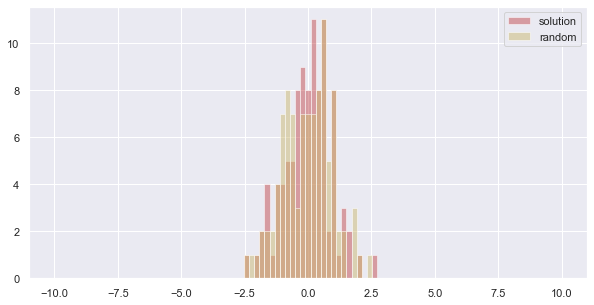

In [81]:
plt.figure(figsize = (10, 5))
bins = np.linspace(-10, 10, 100)

solution = np.random.randn(100)
w = np.random.randn(100)

plt.hist(solution, bins, alpha = 0.5, label = 'solution', color = 'r')
plt.hist(w, bins, alpha = 0.5, label = 'random', color = 'y')
plt.legend()
plt.show()

In [82]:
def f(w):
    return -np.sum(np.square(solution - w))


npop = 50
sigma = 0.1
alpha = 0.001

for i in range(5000):

    if (i + 1) % 1000 == 0:
        print(
            'iter %d. w: %s, solution: %s, reward: %f'
            % (i + 1, str(w[-1]), str(solution[-1]), f(w))
        )
    N = np.random.randn(npop, 100)
    R = np.zeros(npop)
    for j in range(npop):
        w_try = w + sigma * N[j]
        R[j] = f(w_try)

    A = (R - np.mean(R)) / np.std(R)
    w = w + alpha / (npop * sigma) * np.dot(N.T, A)

iter 1000. w: -0.7841008106215833, solution: -1.6190746046341882, reward: -22.016374
iter 2000. w: -1.631447399233338, solution: -1.6190746046341882, reward: -0.005588
iter 3000. w: -1.628614976729557, solution: -1.6190746046341882, reward: -0.006352
iter 4000. w: -1.628485259507941, solution: -1.6190746046341882, reward: -0.008044
iter 5000. w: -1.6242353531090385, solution: -1.6190746046341882, reward: -0.008351


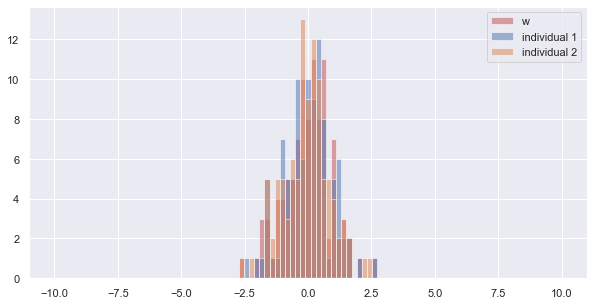

In [83]:
'''
I want to compare my first two individuals with my real w
'''
plt.figure(figsize=(10,5))

sigma = 0.1
N = np.random.randn(npop, 100)
individuals = []
for j in range(2):
    individuals.append(w + sigma * N[j])
    
    
plt.hist(w, bins, alpha=0.5, label='w',color='r')
plt.hist(individuals[0], bins, alpha=0.5, label='individual 1')
plt.hist(individuals[1], bins, alpha=0.5, label='individual 2')
plt.legend()
plt.show()

In [84]:
df= df_full.copy()
name = 'Deep Evolution Strategy'

In [85]:
def get_state(data, t, n):
    d = t - n + 1
    block = data[d : t + 1] if d >= 0 else -d * [data[0]] + data[: t + 1]
    res = []
    for i in range(n - 1):
        res.append(block[i + 1] - block[i])
    return np.array([res])

In [86]:
close = df.Close.values.tolist()
get_state(close, 0, 10)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [87]:
get_state(close, 1, 10)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.20613439]])

In [88]:
get_state(close, 2, 10)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.20613439, -3.69249438]])

In [89]:
class Deep_Evolution_Strategy:
    def __init__(
        self, weights, reward_function, population_size, sigma, learning_rate
    ):
        self.weights = weights
        self.reward_function = reward_function
        self.population_size = population_size
        self.sigma = sigma
        self.learning_rate = learning_rate

    def _get_weight_from_population(self, weights, population):
        weights_population = []
        for index, i in enumerate(population):
            jittered = self.sigma * i
            weights_population.append(weights[index] + jittered)
        return weights_population

    def get_weights(self):
        return self.weights

    def train(self, epoch = 100, print_every = 1):
        lasttime = time.time()
        for i in range(epoch):
            population = []
            rewards = np.zeros(self.population_size)
            for k in range(self.population_size):
                x = []
                for w in self.weights:
                    x.append(np.random.randn(*w.shape))
                population.append(x)
            for k in range(self.population_size):
                weights_population = self._get_weight_from_population(
                    self.weights, population[k]
                )
                rewards[k] = self.reward_function(weights_population)
            rewards = (rewards - np.mean(rewards)) / np.std(rewards)
            for index, w in enumerate(self.weights):
                A = np.array([p[index] for p in population])
                self.weights[index] = (
                    w
                    + self.learning_rate
                    / (self.population_size * self.sigma)
                    * np.dot(A.T, rewards).T
                )
            if (i + 1) % print_every == 0:
                print(
                    'iter %d. reward: %f'
                    % (i + 1, self.reward_function(self.weights))
                )
        print('time taken to train:', (time.time() - lasttime)/60, 'minutes')

In [90]:
class Model:
    def __init__(self, input_size, layer_size, output_size):
        self.weights = [
            np.random.randn(input_size, layer_size),
            np.random.randn(layer_size, output_size),
            np.random.randn(layer_size, 1),
            np.random.randn(1, layer_size),
        ]

    def predict(self, inputs):
        feed = np.dot(inputs, self.weights[0]) + self.weights[-1]
        decision = np.dot(feed, self.weights[1])
        buy = np.dot(feed, self.weights[2])
        return decision, buy

    def get_weights(self):
        return self.weights

    def set_weights(self, weights):
        self.weights = weights

In [91]:
window_size = 30
model = Model(window_size, 500, 3)

In [92]:
initial_money = 10000
starting_money = initial_money
len_close = len(close) - 1
weight = model
skip = 1

state = get_state(close, 0, window_size + 1)
inventory = []
quantity = 0

max_buy = 5
max_sell = 5


def act(model, sequence):
    decision, buy = model.predict(np.array(sequence))
    return np.argmax(decision[0]), int(buy[0])


for t in range(0, len_close, skip):
    action, buy = act(weight, state)
    next_state = get_state(close, t + 1, window_size + 1)
    if action == 1 and initial_money >= close[t]:
        if buy < 0:
            buy = 1
        if buy > max_buy:
            buy_units = max_buy
        else:
            buy_units = buy
        total_buy = buy_units * close[t]
        initial_money -= total_buy
        inventory.append(total_buy)
        quantity += buy_units
    elif action == 2 and len(inventory) > 0:
        if quantity > max_sell:
            sell_units = max_sell
        else:
            sell_units = quantity
        quantity -= sell_units
        total_sell = sell_units * close[t]
        initial_money += total_sell

    state = next_state
((initial_money - starting_money) / starting_money) * 100

-0.2648519329501687

In [93]:
import time


class Agent:

    POPULATION_SIZE = 15
    SIGMA = 0.1
    LEARNING_RATE = 0.03

    def __init__(
        self, model, money, max_buy, max_sell, close, window_size, skip
    ):
        self.window_size = window_size
        self.skip = skip
        self.close = close
        self.model = model
        self.initial_money = money
        self.max_buy = max_buy
        self.max_sell = max_sell
        self.es = Deep_Evolution_Strategy(
            self.model.get_weights(),
            self.get_reward,
            self.POPULATION_SIZE,
            self.SIGMA,
            self.LEARNING_RATE,
        )

    def act(self, sequence):
        decision, buy = self.model.predict(np.array(sequence))
        return np.argmax(decision[0]), int(buy[0])

    def get_reward(self, weights):
        initial_money = self.initial_money
        starting_money = initial_money
        len_close = len(self.close) - 1

        self.model.weights = weights
        state = get_state(self.close, 0, self.window_size + 1)
        inventory = []
        quantity = 0
        for t in range(0, len_close, self.skip):
            action, buy = self.act(state)
            next_state = get_state(self.close, t + 1, self.window_size + 1)
            if action == 1 and initial_money >= self.close[t]:
                if buy < 0:
                    buy = 1
                if buy > self.max_buy:
                    buy_units = self.max_buy
                else:
                    buy_units = buy
                total_buy = buy_units * self.close[t]
                initial_money -= total_buy
                inventory.append(total_buy)
                quantity += buy_units
            elif action == 2 and len(inventory) > 0:
                if quantity > self.max_sell:
                    sell_units = self.max_sell
                else:
                    sell_units = quantity
                quantity -= sell_units
                total_sell = sell_units * self.close[t]
                initial_money += total_sell

            state = next_state
        return ((initial_money - starting_money) / starting_money) * 100

    def fit(self, iterations, checkpoint):
        self.es.train(iterations, print_every = checkpoint)

    def buy(self):
        initial_money = self.initial_money
        len_close = len(self.close) - 1
        state = get_state(self.close, 0, self.window_size + 1)
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        quantity = 0
        for t in range(0, len_close, self.skip):
            action, buy = self.act(state)
            next_state = get_state(self.close, t + 1, self.window_size + 1)
            if action == 1 and initial_money >= self.close[t]:
                if buy < 0:
                    buy = 1
                if buy > self.max_buy:
                    buy_units = self.max_buy
                else:
                    buy_units = buy
                total_buy = buy_units * self.close[t]
                initial_money -= total_buy
                inventory.append(total_buy)
                quantity += buy_units
                states_buy.append(t)
                print(
                    'day %d: buy %d units at price %f, total balance %f'
                    % (t, buy_units, total_buy, initial_money)
                )
            elif action == 2 and len(inventory) > 0:
                bought_price = inventory.pop(0)
                if quantity > self.max_sell:
                    sell_units = self.max_sell
                else:
                    sell_units = quantity
                if sell_units < 1:
                    continue
                quantity -= sell_units
                total_sell = sell_units * self.close[t]
                initial_money += total_sell
                states_sell.append(t)
                try:
                    invest = ((total_sell - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (t, sell_units, total_sell, invest, initial_money)
                )
            state = next_state

        invest = ((initial_money - starting_money) / starting_money) * 100
        print(
            '\ntotal gained %f, total investment %f %%'
            % (initial_money - starting_money, invest)
        )
        plt.figure(figsize = (20, 10))
        plt.plot(close, label = 'true close', c = 'g')
        plt.plot(
            close, 'X', label = 'predict buy', markevery = states_buy, c = 'b'
        )
        plt.plot(
            close, 'o', label = 'predict sell', markevery = states_sell, c = 'r'
        )
        plt.title('total gains %f, total investment %f%%'%(initial_money - starting_money, invest))
        plt.legend()
        plt.savefig(f"{name}_{name2}_MaxBuySell_10_Test_Result.png")
        plt.show()

In [104]:
model = Model(input_size = window_size, layer_size = 500, output_size = 3)
agent = Agent(
    model = model,
    money = 10000,
    max_buy = 100,
    max_sell = 100,
    close = close,
    window_size = window_size,
    skip = 1,
)

In [105]:
agent.fit(iterations = 500, checkpoint = 20) # change from 10 to 20

iter 20. reward: -427.484259
iter 40. reward: -181.441734
iter 60. reward: 1231.189745
iter 80. reward: 1318.924199
iter 100. reward: 1410.552783
iter 120. reward: 2120.141198
iter 140. reward: 2160.384031
iter 160. reward: 2351.443501
iter 180. reward: 2074.508572
iter 200. reward: 2304.125809
iter 220. reward: 2304.704224
iter 240. reward: 2233.514784
iter 260. reward: 2514.989128
iter 280. reward: 2706.192761
iter 300. reward: 2520.466248
iter 320. reward: 3049.880028
iter 340. reward: 2797.068098
iter 360. reward: 2418.851347
iter 380. reward: 2836.831419
iter 400. reward: 2880.006873
iter 420. reward: 2967.629824
iter 440. reward: 3058.342695
iter 460. reward: 2940.047744
iter 480. reward: 3460.262679
iter 500. reward: 3174.302222
time taken to train: 12.488359491030375 minutes


day 2: buy 13 units at price 4457.002039, total balance 5542.997961
day 4: buy 1 units at price 340.946289, total balance 5202.051671
day 6: buy 100 units at price 34142.129468, total balance -28940.077796
day 7, sell 100 units at price 33903.730558, investment 660.684654 %, total balance 4963.652762,
day 9, sell 14 units at price 4702.732163, investment 1279.317596 %, total balance 9666.384925,
day 11: buy 5 units at price 1690.974216, total balance 7975.410709
day 13: buy 100 units at price 33883.117119, total balance -25907.706410
day 15, sell 100 units at price 34803.552005, investment 1.937262 %, total balance 8895.845594,
day 16: buy 100 units at price 34005.005283, total balance -25109.159689
day 22, sell 100 units at price 33877.739700, investment 1903.445078 %, total balance 8768.580011,
day 23, sell 5 units at price 1691.287899, investment -95.008464 %, total balance 10459.867911,
day 29: buy 100 units at price 34503.312777, total balance -24043.444866
day 31, sell 100 units 

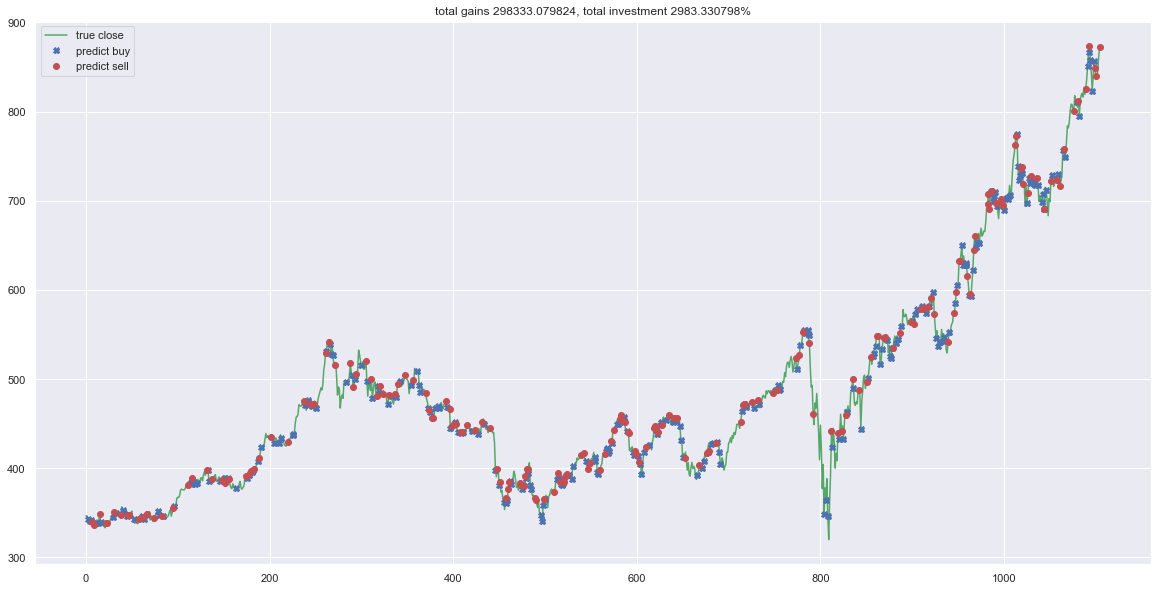

In [106]:
agent.buy()